## Review of Overall Machine Learning Process

1. Data Loader
2. Generating the Model (DecisionTreeClassifier, RandomForestClassifier) 
3. Training the Model
4. Predict
5. Evaluation (accuracy_score, precision_score, recall_score, confusion_matrix)

## 1.Sklearn Iris DataLoader

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
iris.data
iris.feature_names
iris.target_names

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

## 2. Generating RandomForest model and 3. Training

### RandomForest model
    - RandomForest model uses bagging method (=Randomly choosing some number of features in dataset)  >>  max_features
    - Features are randomly chosen each time when Decision Tree models are generated   >>  n_estmators  (default 100)
    - It is considering all of the results from all Decision Tree models in same percentage, it concludes using Majority Voting (in Classification case) or using average (in Regression case) of the whole Decision Tree models.
    - That's why it's called FOREST. It's a sum of (Decision)Trees
    
    
### Bagging method
    - It is like randomly choosing the certain amount of featues in the box to create Decision Tree model
    - Due to the possibilities that the chosen features might be overlapped,it might have low learning efficiency with poor outcome
    - That's why it's called RANDOM. Features are randomly selected everytime new Decision Tree model is generated  (=bagging)
    - But not likely to have OVERFITTING
    

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
'''
    n_estimators: dt=100
'''

iris_rf = RandomForestClassifier(n_estimators=100, random_state=42)
# To avoid OVERFITTING, RandomForestClassifier can use hyperparameters while generating a model
# ex) n_estimators, max_features (default 100), n_jobs
# n_estimators: how many DecisionTree models are being used
# max_features: how many features are being used when generating DecisionTree models
# n_jobs: how many CPUs are being used 

iris_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

## 4. Predict and 5. Evaluate

### After predicting, there are several ways to evaluate the accuracy 

    1. Manually check the accuracy
    2. Use User-defined function
    3. Use libraries or functions such as score(), accuracy_score()

In [14]:
# 1) Manually check accuracy

y_predict = iris_rf.predict(X_test) 
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [15]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [16]:
# 2) User-defined function 
#    Extracting two lists using zip()

y_tuple=list(zip(y_test, y_predict))

for a,b in y_tuple:
    if(a!=b):
        print('unmatched')

unmatched


In [17]:
# 3) Use libraries or functions such as score(), accuracy_score()
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.9736842105263158


## Evaluation

### Accuracy_score, Precision_score, Recall_score

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [20]:
precision = precision_score(y_test, y_predict, average='weighted')  

recall = recall_score(y_test, y_predict, average='weighted')
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print("*"*60)
print('Accuracy: {0:.3f}, Precision: {1:.3f}, Recall: {2:.3f}'.format(accuracy, precision, recall))

Precision: 0.976
Recall: 0.974
************************************************************
Accuracy: 0.974, Precision: 0.976, Recall: 0.974


## 4. Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
y_true=[2,0,2,2,0,1]  # answer
y_pred=[0,0,2,2,0,2]  # prediction

confusion_matrix(y_true, y_pred)

# Accuracy = Diagonal line: Predicted 0 twice to actual 0s, Predicted nothing to actual 1s and Predicted 2 twice to actual 2s
# Predicted Values = Horizontal >>> Recall 
# Actual Answers = Vertical>>> Precision

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [23]:
a=['cherry','apple','apple','banana','cherry']  # answer
b=['banana','apple','apple','banana','apple'] # prediction
confusion_matrix(a,b)

array([[2, 0, 0],
       [0, 1, 0],
       [1, 1, 0]], dtype=int64)

In [24]:
a=['cherry','apple','apple','banana','cherry']  # answer
b=['banana','apple','apple','banana','apple'] # prediction
confusion_matrix(a,b, labels=['cherry','apple','banana'])

# Changing the default labels sequence

array([[0, 1, 1],
       [0, 2, 0],
       [0, 0, 1]], dtype=int64)

## Using Confusion Matrix in Iris dataset

In [26]:
cm = pd.DataFrame(confusion_matrix(y_test, y_predict))
cm

# Confusion Matrix returns two-dimensional data which can be used in the DataFrame

,0,1,2
0,13,0,0
1,0,15,1
2,0,0,9


In [27]:
cm = pd.DataFrame(confusion_matrix(y_test, y_predict), index = iris.target_names, columns=iris.target_names)
cm

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,15,1
virginica,0,0,9


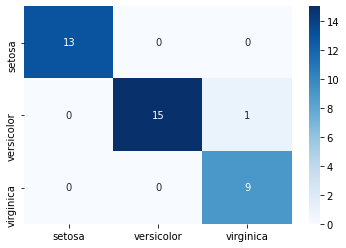

In [91]:
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)

## Summary Code

In [29]:
iris_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
# Using hyper-parameters like n_estimators, max_features, max_depth, min_sample_split when generating RandomForestClassifier model

iris_rf.fit(X_train, y_train)
y_predict = iris_rf.predict(X_test)
print(y_predict)
print(y_test)
accuracy=accuracy_score(y_test, y_predict)
print(accuracy)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
0.9736842105263158
